In [42]:


def d_r(r, E, L):
    return (E**2 - L**2/r**2 * (1-1/r) )**0.5

def d_phi(r, E, L):
    return L/r**2 

In [2]:
from matplotlib import pyplot as plt
import numpy as np 
import scipy as sp 

[2.0, 2.0035355339059326, 2.0070741914125887, 2.010615972405215, 2.0141608766546835, 2.0177089038192033, 2.0212600534460123, 2.0248143249730473, 2.0283717177305927, 2.0319322309429104, 2.0354958637298464, 2.0390626151084197, 2.0426324839943906, 2.0462054692038087, 2.049781569454543, 2.0533607833677916, 2.0569431094695734, 2.060528546192201, 2.0641170918757337, 2.067708744769416, 2.071303503033094, 2.0749013647386176, 2.0785023278712225, 2.082106390330897, 2.0857135499337303, 2.0893238044132456, 2.092937151421715, 2.096553588531459, 2.100173113236128, 2.103795722951972, 2.10742141501909, 2.1110501867026663, 2.1146820351941904, 2.1183169576126617, 2.1219549510057805, 2.125596012351122, 2.1292401385572983, 2.1328873264651027, 2.136537572848643, 2.140190874416457, 2.1438472278126195, 2.1475066296178285, 2.151169076350484, 2.15483456446775, 2.158503090366603, 2.1621746503848702, 2.1658492408022516, 2.169526857841331, 2.173207497668574, 2.176891156395313, 2.1805778300787204, 2.18426751472277

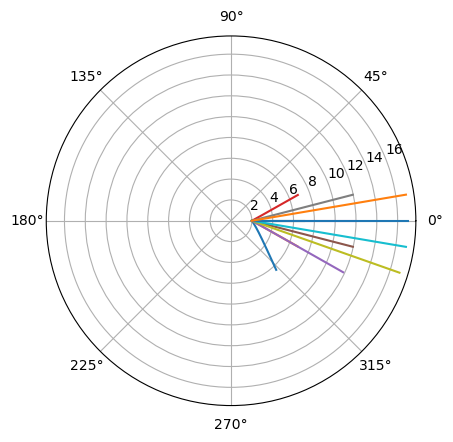

In [94]:
from scipy.integrate import solve_ivp

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})


def dy(t, y, E, L):


    # print(y[0])
    # print(d_r(y[0], E, L))
    # return [0, 0]
    return [d_r(y[0], E, L), d_phi(y[0], E, L)]

# (r, phi)
y0 = [2.0, 0.0]
t_span = [0, 1]


def hit(t, y):
    return y[0] <= 1.1 or y[0] >= 10.0

hit.terminal = True

for E in np.arange(0, 1, 0.5):
    for L in np.arange(-5,5, 0.1):
        if E==0:
            continue
        # print(E, L)

        # solution = solve_ivp(dy, t_span, y0, args=(E,L))
        
        r = [2.0]
        phi = [0.0]

        step_size = 0.01 
        for i in range(1000):
            r_ = step_size*d_r(r[-1], E, L)
            p_ = step_size*d_phi(r[-1], E, L)
            r.append( r[-1]+r_) 
            phi.append(phi[-1] + p_) 


        print(r)
        ax.plot(phi, r)
        # plt.polar(solution.y[1], solution.y[0])


# plt.plot(solution.t, solution.y[1])